# 노트
작성자 : 이슬아  
엘리스 제공 기본 데이터셋  
기간 : 2019-08-01 ~ 2021-08-31

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
plt.rc('font', family='AppleGothic')

In [6]:
# # 4개의 데이터 하나로 통합하기
# df_1 = pd.read_csv('/Users/seulalee/OneDrive/MyStudy/210816_엘리스AI트랙/project/project-template/rawdata/elicer_col_name/elicer_2019_col_name.csv')
# df_2 = pd.read_csv('/Users/seulalee/OneDrive/MyStudy/210816_엘리스AI트랙/project/project-template/rawdata/elicer_col_name/elicer_2020_1_col_name.csv', encoding = 'cp949')
# df_3 = pd.read_csv('/Users/seulalee/OneDrive/MyStudy/210816_엘리스AI트랙/project/project-template/rawdata/elicer_col_name/elicer_2020_2_col_name.csv')
# df_4 = pd.read_csv('/Users/seulalee/OneDrive/MyStudy/210816_엘리스AI트랙/project/project-template/rawdata/elicer_col_name/elicer_2021_col_name.csv', encoding = 'cp949')

In [ ]:
# print(df_1.size+df_2.size+df_3.size+df_4.size)

In [19]:
# df = np.concatenate([df_1, df_2, df_3, df_4])
# df = pd.DataFrame(df)

In [5]:
df = pd.read_csv('/Users/seulalee/OneDrive/MyStudy/210816_엘리스AI트랙/TeamProject1/Team11_NaplessRabbit/project-template/rawdata/시간-지역별배달주문건수/time_area_delivery_freq.csv')

In [7]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [8]:
df.head(10)

,0,1,2,3,4,5
0,2019-08-01,0,강원도,속초시,교동,1
1,2019-08-01,0,경기도,고양시 일산동구,마두동,4
2,2019-08-01,0,경기도,고양시 일산동구,백석동,28
3,2019-08-01,0,경기도,고양시 일산동구,식사동,3
4,2019-08-01,0,경기도,고양시 일산동구,장항동,4
5,2019-08-01,0,경기도,고양시 일산동구,정발산동,2
6,2019-08-01,0,경기도,고양시 일산서구,일산동,7
7,2019-08-01,0,경기도,고양시 일산서구,탄현동,3
8,2019-08-01,0,경기도,광명시,광명동,9
9,2019-08-01,0,경기도,광명시,철산동,13


In [48]:
# df.to_csv('/Users/seulalee/OneDrive/MyStudy/210816_엘리스AI트랙/TeamProject1/Team11_NaplessRabbit/project-template/rawdata/시간-지역별배달주문건수/time_area_delivery_frequency.csv')

In [12]:
# 컬럼이름 넣어주기
df.columns=['날짜','시간대', '광역시도', '시군구', '읍면동', '배달건수']
df

,날짜,시간대,광역시도,시군구,읍면동,배달건수
0,2019-08-01,0,강원도,속초시,교동,1
1,2019-08-01,0,경기도,고양시 일산동구,마두동,4
2,2019-08-01,0,경기도,고양시 일산동구,백석동,28
3,2019-08-01,0,경기도,고양시 일산동구,식사동,3
4,2019-08-01,0,경기도,고양시 일산동구,장항동,4
...,...,...,...,...,...,...
2382976,2021-08-31,23,충청남도,천안시 서북구,쌍용동,6
2382977,2021-08-31,23,충청북도,제천시,신백동,6
2382978,2021-08-31,23,충청북도,제천시,신월동,2
2382979,2021-08-31,23,충청북도,제천시,천남동,1


In [13]:
# 기간 확인
print(np.min(df['날짜']))
print(np.max(df['날짜']))

2019-08-01
2021-08-31


날짜      object
시간대      int64
광역시도    object
시군구     object
읍면동     object
배달건수     int64
dtype: object

In [64]:
df.sort_values('날짜').tail()

,날짜,시간대,광역시도,시군구,읍면동,배달건수
2381247,2021-08-31,14,경기도,의정부시,민락동,53
2381248,2021-08-31,14,경기도,의정부시,산곡동,2
2381249,2021-08-31,14,경기도,의정부시,신곡동,16
2381231,2021-08-31,14,경기도,안산시 상록구,이동,3
2382980,2021-08-31,23,충청북도,제천시,하소동,4


<BarContainer object of 16 artists>

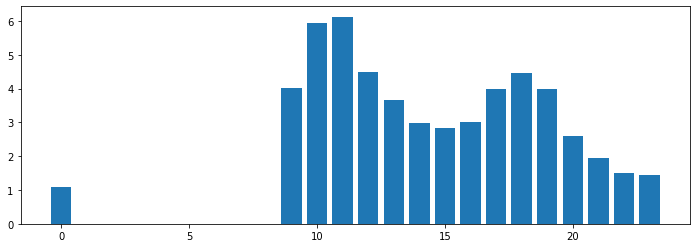

In [67]:
# 지역별 - 시간대별 배달 변화량은 어떨까? ; 용산구의 시간대별 배달주문량 변화 그래프로 그리기
si_gun_gu = df[(df['광역시도']=='서울특별시')&(df['시군구']=='용산구')]
yongsangu = si_gun_gu.groupby('시간대').mean().reset_index()

fig, ax = plt.subplots(figsize=(12, 4))
ax.bar(yongsangu['시간대'], yongsangu['배달건수'])

In [78]:
# 지역별 - 시간대별 배달 변화량은 어떨까? ; 용산구의 시간대별 배달주문량 변화 그래프로 그리기  -  2019, 2020, 2021에 따른 편향이 있는지 확인


In [100]:
# 날짜에서 요일 볼 수 있나?
df['날짜'] = pd.to_datetime(df['날짜'], format='%Y-%m-%d')
# df.query('날짜.dt.dayofweek == 0') # 월요일만 모아보기

num_to_day = {
    0 : '월요일',
    1 : '화요일',
    2 : '수요일',
    3 : '목요일',
    4 : '금요일',
    5 : '토요일',
    6 : '일요일',
}

df['요일'] = [num_to_day[k] for k in df['날짜'].dt.dayofweek] ## 요일 칼럼
df.tail()

,날짜,시간대,광역시도,시군구,읍면동,배달건수,요일
2382976,2021-08-31,23,충청남도,천안시 서북구,쌍용동,6,화요일
2382977,2021-08-31,23,충청북도,제천시,신백동,6,화요일
2382978,2021-08-31,23,충청북도,제천시,신월동,2,화요일
2382979,2021-08-31,23,충청북도,제천시,천남동,1,화요일
2382980,2021-08-31,23,충청북도,제천시,하소동,4,화요일


In [101]:
df.to_csv('/Users/seulalee/OneDrive/MyStudy/210816_엘리스AI트랙/TeamProject1/Team11_NaplessRabbit/project-template/rawdata/시간-지역별배달주문건수/time_area_delivery_frequency.csv')

<BarContainer object of 7 artists>

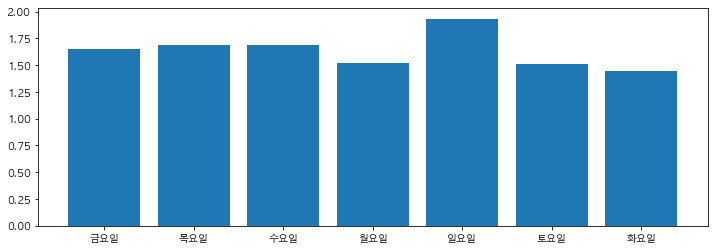

In [108]:
# 지역별 - 요일별 배달 변화량은 어떨까? ; 용산구의 시간대별 배달주문량 변화 그래프로 그리기 - 요일별 시간당

si_gun_gu = df[(df['광역시도']=='서울특별시')&(df['시군구']=='중구')]
gu = si_gun_gu.groupby('요일').mean().reset_index()

fig, ax = plt.subplots(figsize=(12, 4))
ax.bar(gu['요일'], gu['배달건수'])

In [68]:
# [용산구] 배달주문량, [코로나 확진자수]에 따라 어떻게 달라졌을까요?
# , 비가 오는 날은 어땠을까요?
# , 계절에 따라 어떻게 달랐을까요?
# , 요일별로 어떻게 달랐을까요?


In [1]:
# 요일 컬럼 생성
df['날짜'].head()


NameError: name 'df' is not defined